### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura (x) y la edad  (y) de los alumnos de la clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?
- ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad? 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
lista_edad_altura =[("Clara Piniella", 30, 1.66),
("Daniel Walker", 34, 1.87), 
("Leonardo Frazzetto", 31, 1.78),
("Xinru Yang", 24, 1.60), 
("Jorge Garcia", 28, 1.79),
("Jonathan Suárez", 27, 1.86),
("Marina Serrano", 25, 1.54), 
("Karina Inche", 30, 1.61), 
("Mary Meza", 32, 1.52),
("Borja Puig", 37, 1.82),
("Mauro Garcia-Oliva", 45, 1.77),
("José Carlos Batista", 28, 1.70),
("Isabel Palomares",24,1.78),
("Gina Garrido",57,1.63), 
("Sonia Cobo", 29, 1.73), 
("Miguel Barquero", 35, 1.85),
("Nacho Astorga",47,1.78),
("Adrià Gallardo", 24, 1.70),
("Juan Bayon", 38, 1.64),
("Nacho Fontal", 35, 1.82), 
("Pablo Eduardo", 25, 1.78),
("Javier Araiz", 25, 1.75)]

In [3]:
x = []
y = []
for i in lista_edad_altura:
    x.append(i[2])
    y.append(i[1])

print(x)
print(y)



[1.66, 1.87, 1.78, 1.6, 1.79, 1.86, 1.54, 1.61, 1.52, 1.82, 1.77, 1.7, 1.78, 1.63, 1.73, 1.85, 1.78, 1.7, 1.64, 1.82, 1.78, 1.75]
[30, 34, 31, 24, 28, 27, 25, 30, 32, 37, 45, 28, 24, 57, 29, 35, 47, 24, 38, 35, 25, 25]


In [4]:
X = np.array(x).reshape(-1,1)
X

array([[1.66],
       [1.87],
       [1.78],
       [1.6 ],
       [1.79],
       [1.86],
       [1.54],
       [1.61],
       [1.52],
       [1.82],
       [1.77],
       [1.7 ],
       [1.78],
       [1.63],
       [1.73],
       [1.85],
       [1.78],
       [1.7 ],
       [1.64],
       [1.82],
       [1.78],
       [1.75]])

In [5]:
y = np.array(y).reshape(-1,1)
y

array([[30],
       [34],
       [31],
       [24],
       [28],
       [27],
       [25],
       [30],
       [32],
       [37],
       [45],
       [28],
       [24],
       [57],
       [29],
       [35],
       [47],
       [24],
       [38],
       [35],
       [25],
       [25]])

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

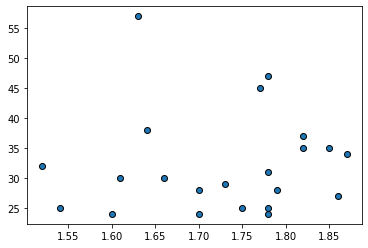

In [7]:
from sklearn.linear_model import LinearRegression
plt.scatter(X,y, edgecolor='black')


#### ¿Es una buena técnica para este tipo de problemas? ¿Por qué?
 - No, porque su correlación es nula, la correlacion lineal no tiene ningún sentido usarla en este modelo.

In [8]:
new_model2 = LinearRegression(n_jobs=-1)
new_model2.fit(X, y)

LinearRegression(n_jobs=-1)

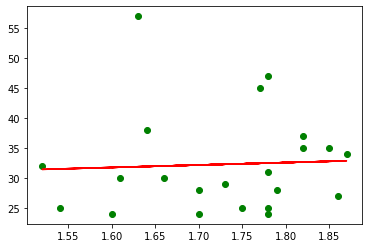

In [9]:
plt.scatter(X, y, color='g')
plt.plot(X, new_model2.predict(X), color='red')

In [10]:
new_model2.score(X, y) * 100

0.24013509553858503

In [11]:
# secante
new_model2.intercept_

array([25.23322803])

In [12]:
# pendiente
new_model2.coef_

array([[4.07764569]])

#### ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python).

In [13]:
# y = a(secante) + b(pendiente)X
y = 25.23 + 4.07*X

In [14]:
import pandas as pd 
df = pd.DataFrame((lista_edad_altura), columns=["Nombre","Edad","Altura"])


In [15]:
new_model2.predict(X).flatten()

array([32.00211988, 32.85842547, 32.49143736, 31.75746114, 32.53221382,
       32.81764901, 31.51280239, 31.79823759, 31.43124948, 32.65454319,
       32.4506609 , 32.1652257 , 32.49143736, 31.87979051, 32.28755508,
       32.77687256, 32.49143736, 32.1652257 , 31.92056696, 32.65454319,
       32.49143736, 32.36910799])

In [16]:
df["Predicción:(y)"] = new_model2.predict(X).flatten() #encontramos la predicción (y)
df

,Nombre,Edad,Altura,Predicción:(y)
0,Clara Piniella,30,1.66,32.002120
1,Daniel Walker,34,1.87,32.858425
2,Leonardo Frazzetto,31,1.78,32.491437
3,Xinru Yang,24,1.60,31.757461
4,Jorge Garcia,28,1.79,32.532214
5,Jonathan Suárez,27,1.86,32.817649
6,Marina Serrano,25,1.54,31.512802
7,Karina Inche,30,1.61,31.798238
8,Mary Meza,32,1.52,31.431249
9,Borja Puig,37,1.82,32.654543


In [17]:
df["Error"] = df["Predicción:(y)"] - df["Edad"] #el error para cada uno de mis datos predecidos es: "Error"

In [18]:
df

,Nombre,Edad,Altura,Predicción:(y),Error
0,Clara Piniella,30,1.66,32.002120,2.002120
1,Daniel Walker,34,1.87,32.858425,-1.141575
2,Leonardo Frazzetto,31,1.78,32.491437,1.491437
3,Xinru Yang,24,1.60,31.757461,7.757461
4,Jorge Garcia,28,1.79,32.532214,4.532214
5,Jonathan Suárez,27,1.86,32.817649,5.817649
6,Marina Serrano,25,1.54,31.512802,6.512802
7,Karina Inche,30,1.61,31.798238,1.798238
8,Mary Meza,32,1.52,31.431249,-0.568751
9,Borja Puig,37,1.82,32.654543,-4.345457


#### Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?

In [19]:
new_modelnuevo = LinearRegression(n_jobs=-1)
new_modelnuevo.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [20]:
new_modelnuevo.predict(X_test)

array([[31.56705509],
       [30.34020547],
       [30.61283872],
       [32.65758809],
       [30.20388885]])

In [21]:
y_test

array([[28],
       [30],
       [57],
       [24],
       [24]])

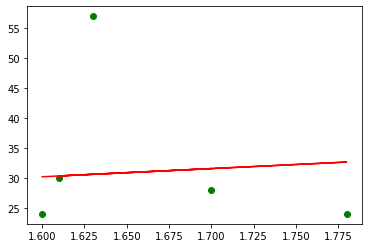

In [22]:
plt.scatter(X_test, y_test, color='g')
plt.plot(X_test, new_modelnuevo.predict(X_test), color='red')

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [24]:
mean_squared_error(y_test, new_modelnuevo.predict(X_test))

164.5127940751501

In [25]:
np.sqrt(mean_squared_error(y_test, new_modelnuevo.predict(X_test))) #esta medida del error es mejor porque así podemos inferir que tenemos un error muy alto, diferente a los demás y lo podemos ver más cerca de la linea de regresión.

12.826254093660788

In [26]:
mean_absolute_error(y_test, new_modelnuevo.predict(X_test))

9.031179755912571

#### Representa la matriz de correlación, ¿los datos están correlacionados?

 - Los datos no estan correlacion entre si.


In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [28]:
#Displaying correlation among all the columns 
df.corr()

,Edad,Altura,Predicción:(y),Error
Edad,1.000000,4.900358e-02,4.900358e-02,-9.987986e-01
Altura,0.049004,1.000000e+00,1.000000e+00,-2.885929e-16
Predicción:(y),0.049004,1.000000e+00,1.000000e+00,-2.426550e-15
Error,-0.998799,-2.885929e-16,-2.426550e-15,1.000000e+00


<AxesSubplot:>

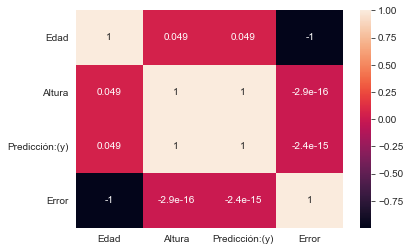

In [29]:
sns.heatmap(df.corr(), annot=True)

#### ¿Qué ocurre si la altura se multiplica por dos? ¿Y si se multiplica solo la edad?

In [30]:
df.head()

,Nombre,Edad,Altura,Predicción:(y),Error
0,Clara Piniella,30,1.66,32.002120,2.002120
1,Daniel Walker,34,1.87,32.858425,-1.141575
2,Leonardo Frazzetto,31,1.78,32.491437,1.491437
3,Xinru Yang,24,1.60,31.757461,7.757461
4,Jorge Garcia,28,1.79,32.532214,4.532214


In [41]:
df['Edad'] = df['Altura'].apply(lambda x: x*2)

In [42]:
df.corr() #vemos si hay correlación con la altura múltiplicada por 2

,Edad,Altura,Predicción:(y),Error
Edad,1.000000e+00,1.000000e+00,1.000000e+00,-2.885929e-16
Altura,1.000000e+00,1.000000e+00,1.000000e+00,-2.885929e-16
Predicción:(y),1.000000e+00,1.000000e+00,1.000000e+00,-2.426550e-15
Error,-2.885929e-16,-2.885929e-16,-2.426550e-15,1.000000e+00


<AxesSubplot:>

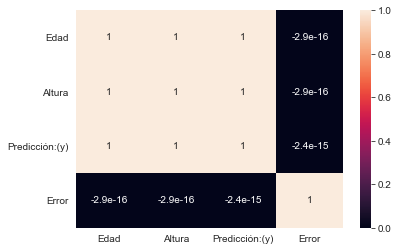

In [43]:
sns.heatmap(df.corr(), annot=True) #parece que si existe correlación si se múltiplica la altura por dos, ya que el modelo representa que a más edad debe haber más altura.... lo cual no es del todo cierto en la vida real.

In [36]:
df['Edad'] = df['Edad'].apply(lambda x: x*2)
df['Altura'] = df['Altura'].apply(lambda x: x/2)

In [38]:
df.head()

,Nombre,Edad,Altura,Predicción:(y),Error
0,Clara Piniella,120,1.66,32.002120,2.002120
1,Daniel Walker,136,1.87,32.858425,-1.141575
2,Leonardo Frazzetto,124,1.78,32.491437,1.491437
3,Xinru Yang,96,1.60,31.757461,7.757461
4,Jorge Garcia,112,1.79,32.532214,4.532214


In [39]:
df.corr()

,Edad,Altura,Predicción:(y),Error
Edad,1.000000,4.900358e-02,4.900358e-02,-9.987986e-01
Altura,0.049004,1.000000e+00,1.000000e+00,-2.885929e-16
Predicción:(y),0.049004,1.000000e+00,1.000000e+00,-2.426550e-15
Error,-0.998799,-2.885929e-16,-2.426550e-15,1.000000e+00


<AxesSubplot:>

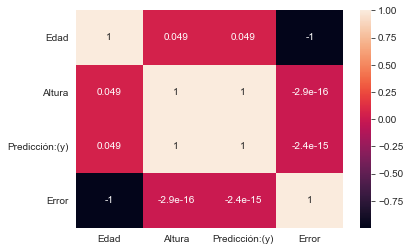

In [40]:
sns.heatmap(df.corr(), annot=True)
